Plot distributions of surrogate neural firing rates during natural song modeled using Baker et al neural data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

FBAKER_PARAMS = {
    'lin': 'data/simple/neur/baker_lin_fit_param.csv',
    'ln': 'data/simple/neur/baker_ln_fit_param.csv',
    'ln2e': 'data/simple/neur/baker_ln2e_fit_param.csv',
    'ma': 'data/simple/neur/baker_ma_fit_param.csv',
}

PFX_BAKER_TRS = {
    'lin': 'data/simple/mlv/neur_basic/baker_lin/mlv_baker_lin_tr',
    'ln': 'data/simple/mlv/neur_basic/baker_ln/mlv_baker_ln_tr',
    'ln2e': 'data/simple/mlv/neur_basic/baker_ln2e/mlv_baker_ln2e_tr',
    'ma': 'data/simple/mlv/neur_basic/baker_ma/mlv_baker_ma_tr',
}

In [2]:
# FSTRAIN = 'data/simple/strains.csv'
# MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in ['NM91', 'ZH23']]
# MSTRAIN = np.any(MSTRAINS, axis=0)
# ISTRAIN = MSTRAIN.nonzero()[0]

ISTRAIN = np.arange(276)

In [3]:
df_params = {k: pd.read_csv(fbaker_param) for k, fbaker_param in FBAKER_PARAMS.items()}

In [4]:
# means and stds of firing rates across neurons and trials
mns_all = {k: [] for k in PFX_BAKER_TRS}
sds_all = {k: [] for k in PFX_BAKER_TRS}
wt_tr = {}

for k in PFX_BAKER_TRS:
    print(f'{k}...')
    r_cols = [f'R_{itr}' for itr in np.array(df_params[k]['EXPT_ID'])]
    
    mns_all_ = []
    sds_all_ = []
    
    nt_tr = []
    
    pfx_baker_tr = PFX_BAKER_TRS[k]
    
    for itr in ISTRAIN:
        df_tr = np.load(f'{pfx_baker_tr}_{itr}.npy', allow_pickle=True)[0]['df']

        mns_all_.append(np.array(df_tr[r_cols]).mean(axis=0))
        sds_all_.append(np.array(df_tr[r_cols]).std(axis=0))

        nt_tr.append(len(df_tr))

    mns_all_ = np.array(mns_all_)
    sds_all_ = np.array(sds_all_)
    nt_tr = np.array(nt_tr)
    
    mns_all[k] = mns_all_.copy()
    sds_all[k] = sds_all_.copy()
    wt_tr[k] = nt_tr/nt_tr.sum()

lin...
ln...
ln2e...
ma...


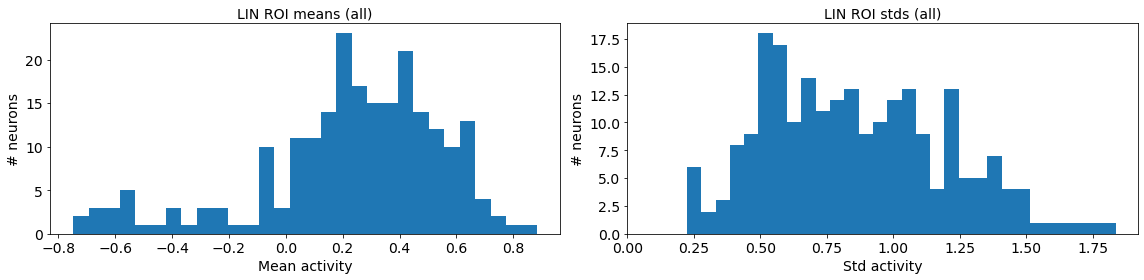

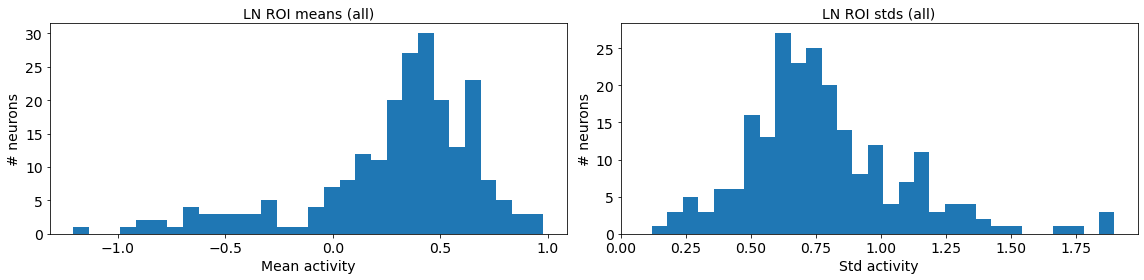

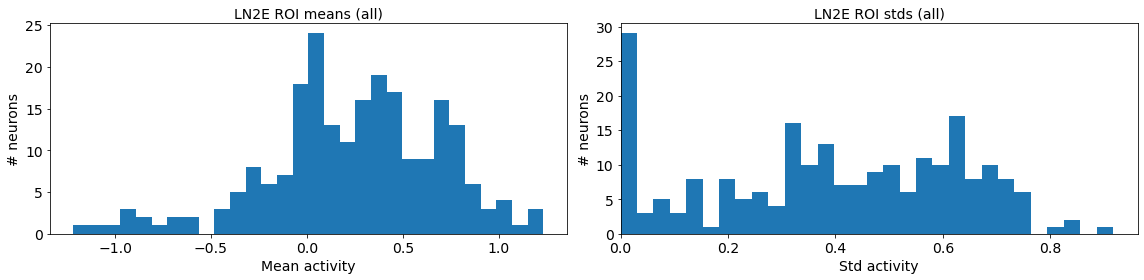

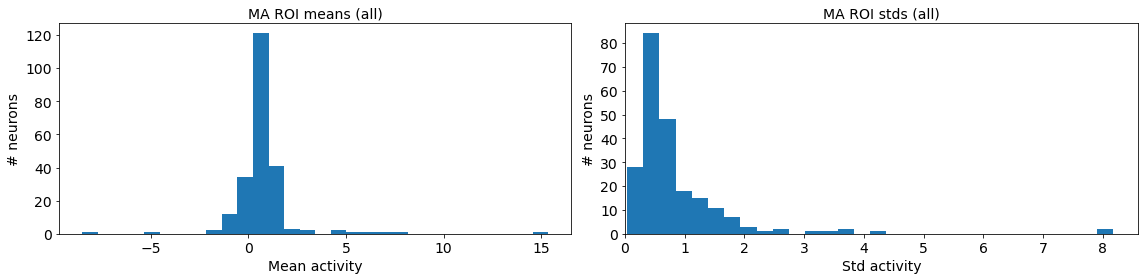

In [8]:
for k in PFX_BAKER_TRS:
    # make figures
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), tight_layout=True)
    # distribution across neurons of each neuron's total mean firing rate across trials
    axs[0].hist(wt_tr[k]@mns_all[k], bins=30)
    set_plot(axs[0], x_label='Mean activity', y_label='# neurons', title=f'{k.upper()} ROI means (all)', font_size=14)

    axs[1].hist(np.sqrt(wt_tr[k]@(sds_all[k]**2)), bins=30)
    axs[1].set_xlim(left=0)
    set_plot(axs[1], x_label='Std activity', y_label='# neurons', title=f'{k.upper()} ROI stds (all)', font_size=14)